In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = None
pd.set_option('display.max_columns',None)


# **Reading the data**

In [1]:
data = pd.read_csv('/content/XYZCorp_LendingData.txt',index_col='id', header=0,sep="\t")
#pd.read_csv('test.txt', sep="\t", header=None)
#data.info()


NameError: ignored

In [ ]:
print(data.head())

# **Creating Copy of dataframe**

In [ ]:
df=data.copy()

In [ ]:
print(df.head())

         member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
id                                                                        
1077501    1296599     5000.0       5000.0           4975.0   36 months   
1077430    1314167     2500.0       2500.0           2500.0   60 months   
1077175    1313524     2400.0       2400.0           2400.0   36 months   
1076863    1277178    10000.0      10000.0          10000.0   36 months   
1075358    1311748     3000.0       3000.0           3000.0   60 months   

         int_rate  installment grade sub_grade                 emp_title  \
id                                                                         
1077501     10.65       162.87     B        B2                       NaN   
1077430     15.27        59.83     C        C4                     Ryder   
1077175     15.96        84.33     C        C5                       NaN   
1076863     13.49       339.31     C        C1       AIR RESOURCES BOARD   
1075358     12.69 

# Checking the attributes

In [ ]:
df.shape

(34929, 72)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt'

#Feature selection - based  on Domain knowledge 

In [ ]:
df=df.drop(['member_id','addr_state','zip_code','collection_recovery_fee','desc','mths_since_last_major_derog',
                'mths_since_last_record','next_pymnt_d','policy_code','recoveries','title'],axis=1)

In [ ]:
df.shape

(34929, 61)

In [ ]:
df.default_ind.value_counts() # the dataset is  biased 

0.0    30003
1.0     4925
Name: default_ind, dtype: int64

In [ ]:
df.dtypes

loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
pymnt_plan                     object
purpose                        object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
mths_since_last_delinq        float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
initial_list

#Analyzing the data

In [ ]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'pymnt_plan', 'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'application_type', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
    

In [ ]:
print(df.annual_inc.max())
print(df.annual_inc.min())
print(df.annual_inc.mean())


9500000.0
0.0
75071.18596268132


Distribution of the annual income

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


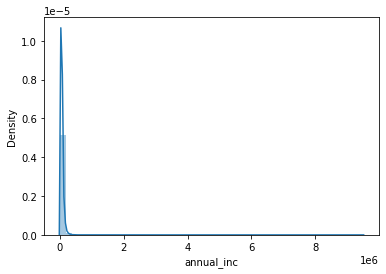

In [ ]:
import seaborn as sns
sns.distplot(df.annual_inc,hist=True)


In [ ]:
pd.crosstab(df.grade,df.default_ind)

default_ind,0,1
grade,,
A,143001,2664
B,238281,9717
C,223853,13002
D,122004,10798
E,59989,6459
F,18315,3013
G,4059,814


In [ ]:
pd.crosstab(df.verification_status,df.default_ind)

default_ind,0,1
verification_status,,
Not Verified,245256,12486
Source Verified,303976,14202
Verified,260270,19779


In [ ]:
df.columns


Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'pymnt_plan', 'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'application_type', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
    

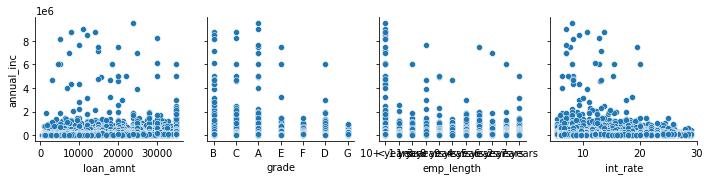

In [ ]:
sns.pairplot(data=df,x_vars=["loan_amnt","grade","emp_length",'int_rate'],y_vars=['annual_inc'],
             kind='scatter')

In [ ]:
'''
#dont run
g = sns.pairplot(df, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")
'''

# **Univariate Plots**

**Histograms**

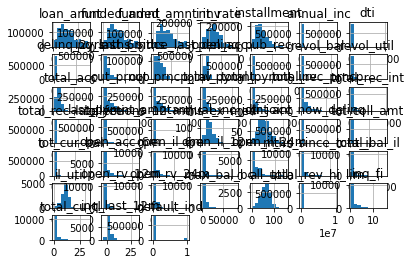

In [ ]:
df.hist()
plt.show()

**Density Plots**

In [ ]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

ValueError: ignored

<Figure size 432x288 with 0 Axes>

**Box and Whisker Plots**

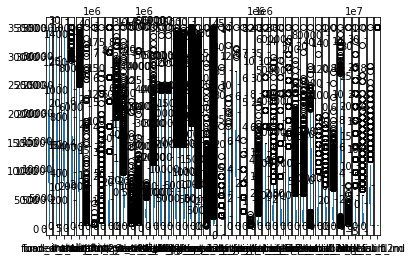

In [ ]:
df.plot(kind='box', subplots=True, sharex=False, sharey=False)
#, layout=(3,3)
plt.show()

# **Multivariate Plots**

**Correlation Matrix Plot**

TypeError: ignored

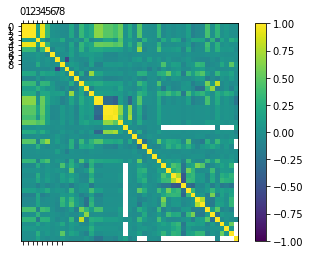

In [ ]:
correlations = df.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

**Scatterplot Matrix**

In [ ]:
scatter_matrix(data)
plt.show()

# Handling the missing values

In [ ]:
df.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2287
emp_length                     1074
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
pymnt_plan                        0
purpose                           1
dti                               1
delinq_2yrs                       1
earliest_cr_line                  1
inq_last_6mths                    1
mths_since_last_delinq        23024
open_acc                          1
pub_rec                           1
revol_bal                         1
revol_util                       33
total_acc                         1
initial_list_status               1
out_prncp                   

In [ ]:
# The annual_inc_joint','dti_joint','verification_status_joint are all related to the  joint  loan category ,
# columns -annual_inc_joint and dti_joint  would  have to be  imputed  with  0 for data related to  individual loans
#'verification_status_joint' has uniqie values as 'Not Verified', 'Source Verified', 'Verified'
# so blank values should be impute with 'Not Verified'

In [ ]:
df['annual_inc_joint'].fillna(value=0,inplace=True)
df['dti_joint'].fillna(value=0,inplace=True)
df['verification_status_joint'].fillna(value='Not Verified',inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

tot_coll_amt                  34929
il_util                       34929
inq_last_12m                  34929
tot_cur_bal                   34929
open_acc_6m                   34929
open_il_6m                    34929
open_il_24m                   34929
mths_since_rcnt_il            34929
total_bal_il                  34929
open_il_12m                   34929
open_rv_12m                   34929
open_rv_24m                   34929
max_bal_bc                    34929
all_util                      34929
total_rev_hi_lim              34929
inq_fi                        34929
total_cu_tl                   34929
mths_since_last_delinq        23024
emp_title                      2287
emp_length                     1074
last_pymnt_d                     65
revol_util                       33
last_credit_pull_d                2
revol_bal                         1
pub_rec                           1
open_acc                          1
default_ind                       1
inq_last_6mths              

In [ ]:
#colname=['il_util','total_bal_il','all_util','max_bal_bc','tot_cur_bal','tot_coll_amt','total_rev_hi_lim','revol_util',]

In [ ]:
colname1=['total_bal_il','all_util','max_bal_bc','tot_cur_bal','tot_coll_amt','total_rev_hi_lim']

In [ ]:

for i in colname1:
  df[i].fillna(round(df[i].mean(),0),inplace=True)

In [ ]:
colname2=['il_util','all_util']

In [ ]:

for i in colname2:
  df[i].fillna(round(df[i].mean(),1),inplace=True)

In [ ]:
df['revol_util'].fillna(round(df['revol_util'].mean(),2),inplace=True)

In [ ]:
colname3=['mths_since_rcnt_il','open_acc_6m','open_rv_12m','open_il_6m','inq_fi','mths_since_last_delinq','last_pymnt_d',
          'collections_12_mths_ex_med','last_credit_pull_d','total_cu_tl','open_rv_24m','inq_last_12m','open_il_12m',
          'open_il_24m']

In [ ]:
for i in colname3:
  df[i].fillna(df[i].mode()[0],inplace=True)

KeyError: ignored

In [ ]:
# Imputing  certain categorical variable with mode value  may  lead to biasing  of the dataset as
# such as emp_title's mode value  is Teacher , while  we  already  have  income variable  to be  used.
# hence  dropping that variable
# Also  Dropping the missing values in the  variable -'Emp_length' as the  mode  value  is 10+ years,
# the  missing values  in this  variable  is  <15% , hence  dropping  those  observations. 

In [ ]:
df=df.drop(['emp_title'],axis=1)
print(df.shape)

In [ ]:
df=df.dropna(subset=['emp_length'])
print(df.shape)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

In [ ]:
#df.default_ind.value_counts()

# **Boxplot**

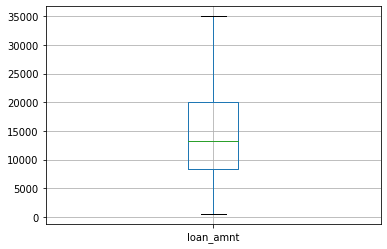

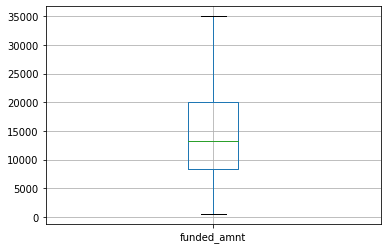

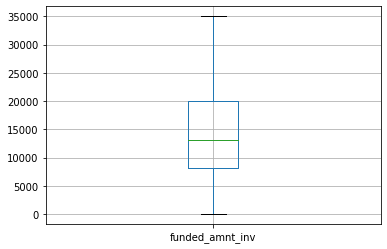

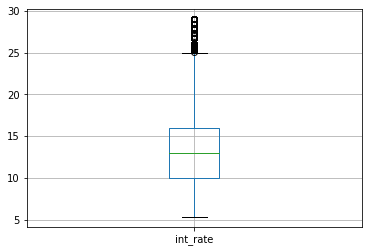

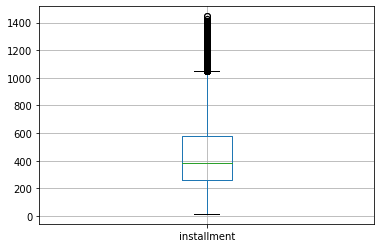

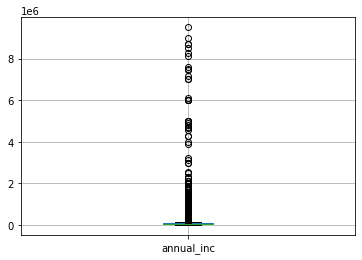

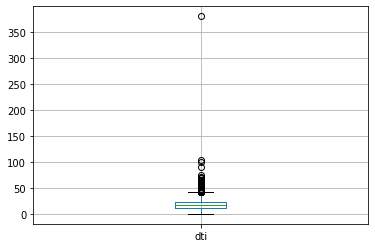

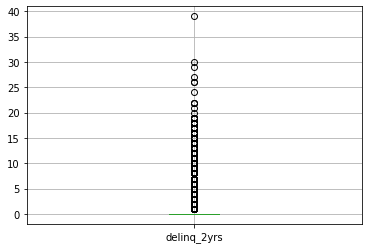

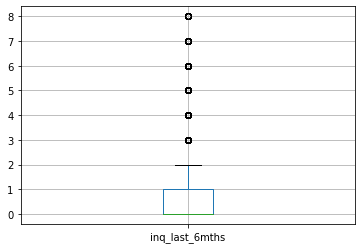

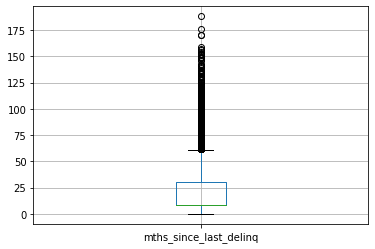

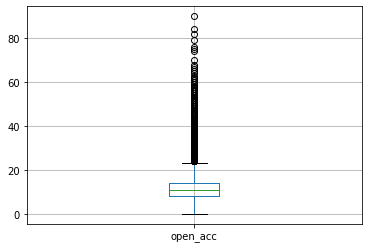

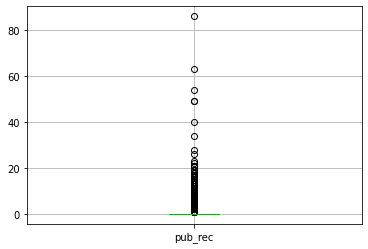

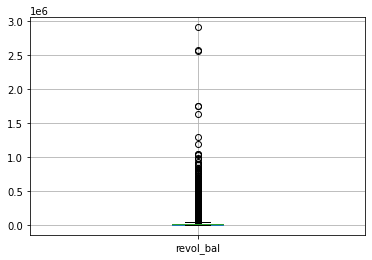

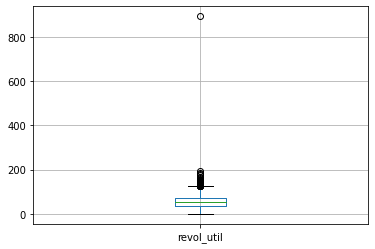

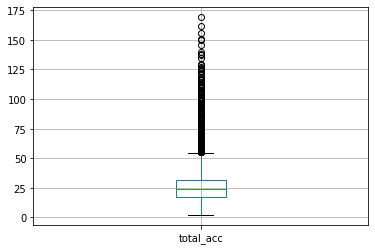

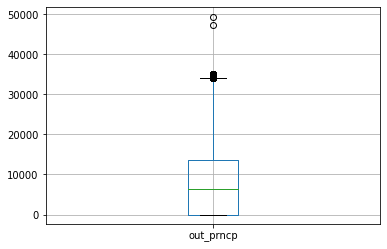

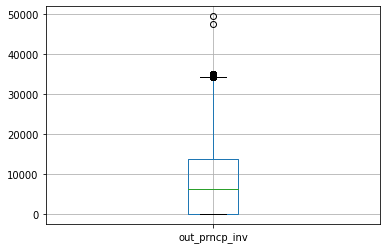

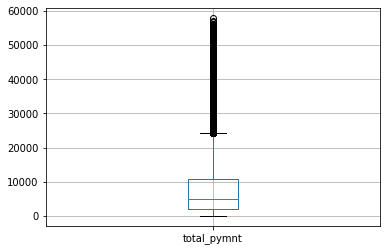

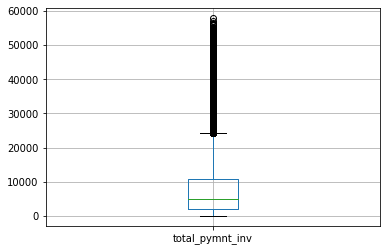

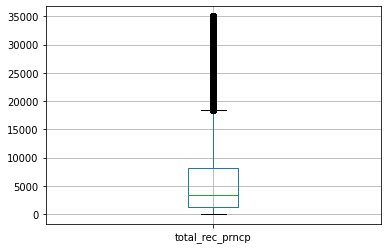

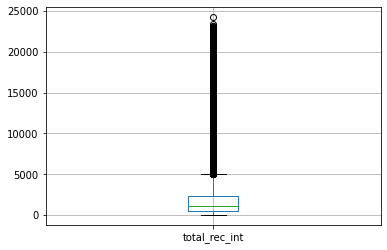

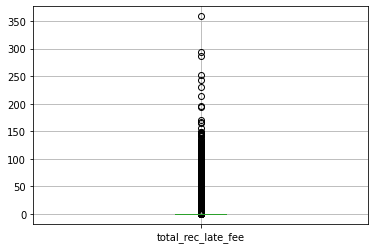

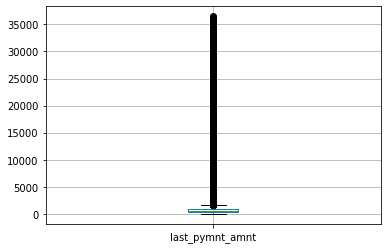

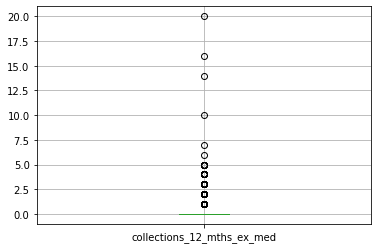

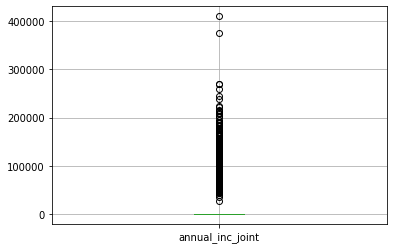

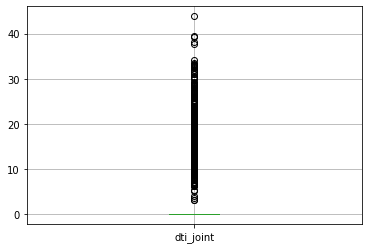

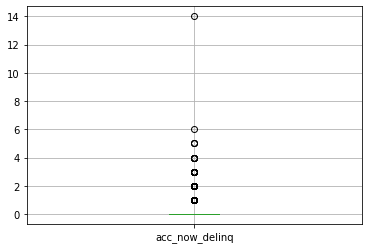

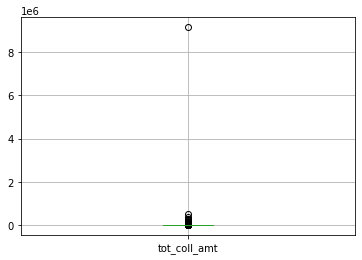

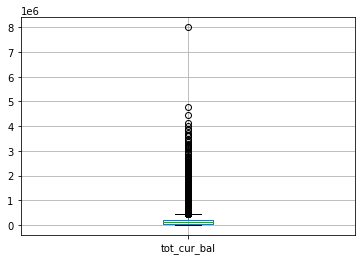

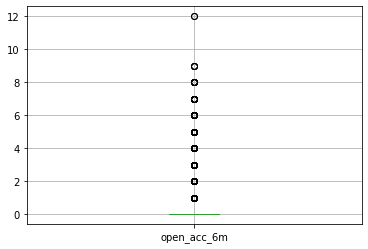

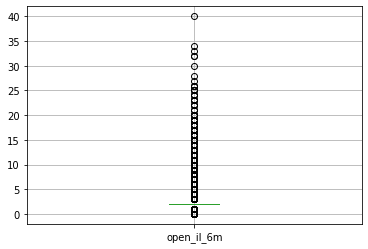

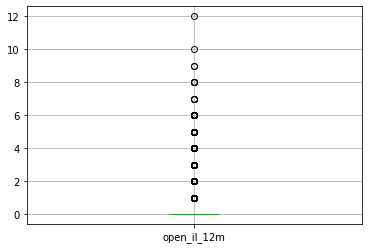

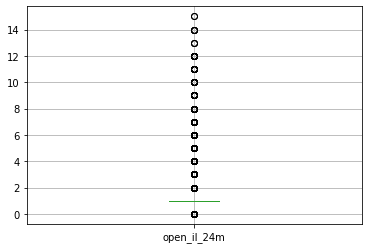

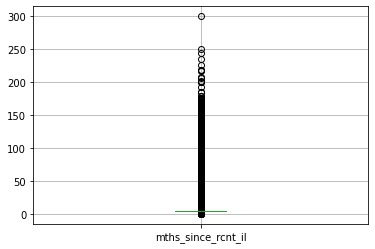

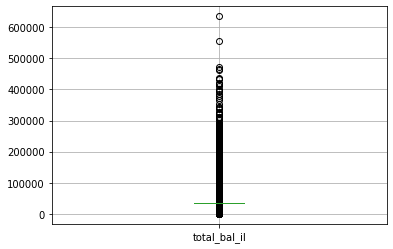

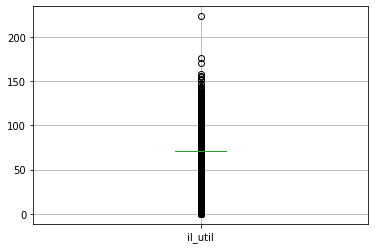

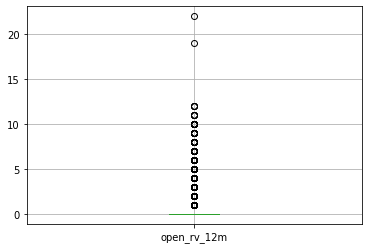

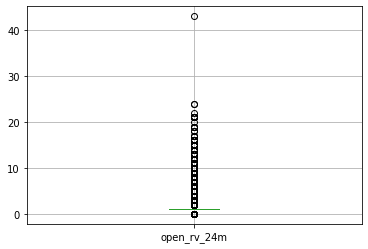

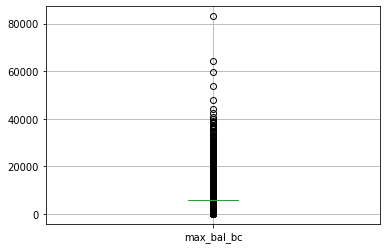

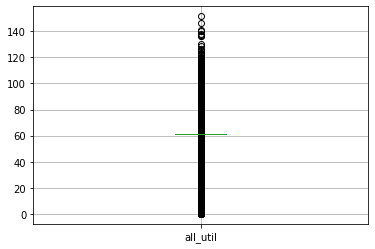

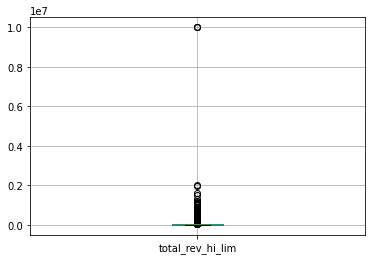

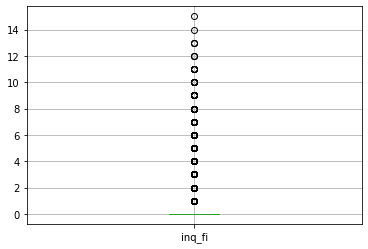

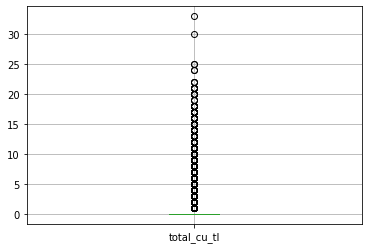

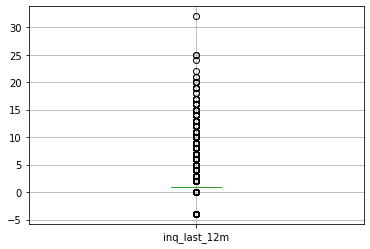

'\n--Variables with outliers--\ndti\ndelinq_2yrs\npub_rec\nrevol_bal\nrevol_util\nout_prncp\nout_prncp_inv\ntotal_rec_late_fee\ncollections_12_mnths_ex_med\nacc_now_delinq\ntot_coll_amt\ntot_cur_bal\ntotal_rev_hi_lim\n\n--Continuos numerical variables--\ndti\nrevol_util\ntot_coll_amt\ntot_cur_bal\ntotal_rev_hi_lim\n'

In [ ]:

colname=[]
for x in df.columns[:-1]:
    if df[x].dtype=="int64" or df[x].dtype=="float64":
        colname.append(x)

for x in colname:
    df.boxplot(column=x)
    plt.show()


'''
--Variables with outliers--
dti
delinq_2yrs
pub_rec
revol_bal
revol_util
out_prncp
out_prncp_inv
total_rec_late_fee
collections_12_mnths_ex_med
acc_now_delinq
tot_coll_amt
tot_cur_bal
total_rev_hi_lim

--Continuos numerical variables--
dti
revol_util
tot_coll_amt
tot_cur_bal
total_rev_hi_lim
'''

#Converting the datetime variables to string 

In [ ]:
col='issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d'

for i in col:
  print(i)
  df[i] = pd.to_datetime(df[i], infer_datetime_format=True) 
  df[i] = df[i].dt.strftime('%m/%Y')

print(df.head())


issue_d
earliest_cr_line
last_pymnt_d
last_credit_pull_d
         loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
id                                                                       
1077501     5000.0       5000.0           4975.0   36 months     10.65   
1077430     2500.0       2500.0           2500.0   60 months     15.27   
1077175     2400.0       2400.0           2400.0   36 months     15.96   
1076863    10000.0      10000.0          10000.0   36 months     13.49   
1075358     3000.0       3000.0           3000.0   60 months     12.69   

         installment grade sub_grade emp_length home_ownership  annual_inc  \
id                                                                           
1077501       162.87     B        B2  10+ years           RENT     24000.0   
1077430        59.83     C        C4   < 1 year           RENT     30000.0   
1077175        84.33     C        C5  10+ years           RENT     12252.0   
1076863       339.31     C        

#Splitting the data into Training and Testing 

In [ ]:
print(df['issue_d'].dtype)


object


In [ ]:
df['issue_d']=pd.to_datetime(df['issue_d'],infer_datetime_format=True)

In [ ]:
split_date = pd.datetime(2015,5,1)
df_train = df.loc[df['issue_d'] <= split_date]
df_test = df.loc[df['issue_d'] > split_date]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """Entry point for launching an IPython kernel.


In [ ]:
print(df_train.shape)
print(df_test.shape)

(570873, 60)
(242035, 60)


#Converting the issue_d back to string  in both training and testing data

In [ ]:
df_train['issue_d']=pd.to_datetime(df_train['issue_d'],infer_datetime_format=True)
df_train['issue_d']=df_train['issue_d'].dt.strftime('%m/%Y')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_test['issue_d']=pd.to_datetime(df_test['issue_d'],infer_datetime_format=True)
df_test['issue_d']=df_test['issue_d'].dt.strftime('%m/%Y')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print(df_train['issue_d'].dtype)
print(df_test['issue_d'].dtype)

object
object


# Converting Categorical data into numerical data-#LabelEncoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
colname=[]
for i in df_train.columns:
    if df_train[i].dtype=='object':
        colname.append(i)
colname

print(colname)

['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'pymnt_plan', 'purpose', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type', 'verification_status_joint']


In [ ]:
for x in colname:
    df_train[x]=le.fit_transform(df_train[x])
    df_test[x]=le.fit_transform(df_test[x])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Splitting  X & Y varaibles   from the training and testing data

In [ ]:
X_train=df_train.values[:,0:-1]
Y_train=df_train.values[:,-1]
X_test=df_test.values[:,0:-1]
Y_test=df_test.values[:,-1]


In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(570873, 59)
(570873,)
(242035, 59)
(242035,)


In [ ]:
Y_train=Y_train.astype(int)
Y_test=Y_test.astype(int)

#Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_DT=DecisionTreeClassifier(criterion="gini",random_state=10,splitter="best")
model_DT.fit(X_train,Y_train)
Y_pred=model_DT.predict(X_test)
#print(Y_pred)

In [ ]:
print(list(zip(df_train.columns,model_DT.feature_importances_)))

[('loan_amnt', 0.002940027606673377), ('funded_amnt', 0.04129943575001117), ('funded_amnt_inv', 0.0008741125718998355), ('term', 1.181673731290008e-06), ('int_rate', 0.00027395749566798026), ('installment', 0.002530579901194769), ('grade', 1.3038390711734931e-05), ('sub_grade', 8.628348175673113e-05), ('emp_length', 6.440140189006491e-05), ('home_ownership', 6.392207253594463e-05), ('annual_inc', 0.0002969081028713841), ('verification_status', 0.0), ('issue_d', 9.35653280084672e-05), ('pymnt_plan', 0.0), ('purpose', 0.0001080755563256654), ('dti', 0.0003509800019695655), ('delinq_2yrs', 8.039832779196558e-05), ('earliest_cr_line', 0.0003223415076959687), ('inq_last_6mths', 8.21492590480167e-05), ('mths_since_last_delinq', 0.00013270509302157463), ('open_acc', 0.00012830555811135195), ('pub_rec', 3.759714578439662e-06), ('revol_bal', 0.00029283760516825936), ('revol_util', 0.00020211877067552225), ('total_acc', 0.00018477028502113496), ('initial_list_status', 0.0), ('out_prncp', 8.70351

In [ ]:
#Evaluation 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report : ")
print(classification_report(Y_test,Y_pred))
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of  the model: ",acc)


[[235878   5870]
 [    56    231]]
Classification report : 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    241748
           1       0.04      0.80      0.07       287

    accuracy                           0.98    242035
   macro avg       0.52      0.89      0.53    242035
weighted avg       1.00      0.98      0.99    242035

Accuracy of  the model:  0.9755159377775942


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_LR=LogisticRegression()
model_LR.fit(X_train,Y_train)
Y_pred=model_LR.predict(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#Evaluation 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report : ")
print(classification_report(Y_test,Y_pred))
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of  the model: ",acc)

[[241701     47]
 [    58    229]]
Classification report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    241748
           1       0.83      0.80      0.81       287

    accuracy                           1.00    242035
   macro avg       0.91      0.90      0.91    242035
weighted avg       1.00      1.00      1.00    242035

Accuracy of  the model:  0.9995661784452662


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=50, random_state=10)   

model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[219005  22743]
 [    50    237]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.91      0.95    241748
           1       0.01      0.83      0.02       287

    accuracy                           0.91    242035
   macro avg       0.51      0.87      0.49    242035
weighted avg       1.00      0.91      0.95    242035

Accuracy of the model:  0.9058276695519243


# K-Fold

In [ ]:
classifier=LogisticRegression()

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10,random_state=10)
print(kfold_cv)

In [ ]:
from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())


In [ ]:

for train_value, test_value in kfold_cv.split(X_train):
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])


Y_pred=classifier.predict(X_test)
print(list(zip(Y_test,Y_pred)))

In [ ]:
#Evaluation 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report : ")
print(classification_report(Y_test,Y_pred))
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of  the model: ",acc)

[[241622    126]
 [    58    229]]
Classification report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    241748
           1       0.65      0.80      0.71       287

    accuracy                           1.00    242035
   macro avg       0.82      0.90      0.86    242035
weighted avg       1.00      1.00      1.00    242035

Accuracy of  the model:  0.9992397793707521


# ***Technique 1 - Upsampling***

In [ ]:
print(df_train.default_ind.value_counts())

0    527289
1     43584
Name: default_ind, dtype: int64


The 'default_ind' variable is baised towards class 0 in both training and testing data

In [ ]:
from sklearn.utils import resample
df_train_minority=df_train[df_train.default_ind==1]
df_train_majority=df_train[df_train.default_ind==0]
df_train_m_upsampled =resample(df_train_minority, replace=True,     # sample with replacement
                                 n_samples=527289,
                                 random_state=10)
df_train_upsampled = pd.concat([df_train_majority, df_train_m_upsampled])

In [ ]:
print(df_train_upsampled.default_ind.value_counts())
print(df_train_upsampled.shape)

1    527289
0    527289
Name: default_ind, dtype: int64
(1054578, 60)


# Splitting  X & Y varaibles   from the training and testing data

In [ ]:
X_train=df_train_upsampled.values[:,0:-1]
Y_train=df_train_upsampled.values[:,-1]
X_test=df_test.values[:,0:-1]
Y_test=df_test.values[:,-1]


In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1054578, 59)
(1054578,)
(242035, 59)
(242035,)


In [ ]:
Y_train=Y_train.astype(int)
Y_test=Y_test.astype(int)

#Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_DT=DecisionTreeClassifier(criterion="gini",random_state=10,splitter="best")
model_DT.fit(X_train,Y_train)
Y_pred=model_DT.predict(X_test)
#print(Y_pred)

In [ ]:
print(list(zip(df_train.columns,model_DT.feature_importances_)))

In [ ]:
#Evaluation 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report : ")
print(classification_report(Y_test,Y_pred))
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of  the model: ",acc)


[[235776   5972]
 [    56    231]]
Classification report : 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    241748
           1       0.04      0.80      0.07       287

    accuracy                           0.98    242035
   macro avg       0.52      0.89      0.53    242035
weighted avg       1.00      0.98      0.99    242035

Accuracy of  the model:  0.9750945111244241


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_LR=LogisticRegression()
model_LR.fit(X_train,Y_train)
Y_pred=model_LR.predict(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#Evaluation 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report : ")
print(classification_report(Y_test,Y_pred))
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of  the model: ",acc)

[[241588    160]
 [    58    229]]
Classification report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    241748
           1       0.59      0.80      0.68       287

    accuracy                           1.00    242035
   macro avg       0.79      0.90      0.84    242035
weighted avg       1.00      1.00      1.00    242035

Accuracy of  the model:  0.9990993038196955


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=50, random_state=10)   


model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred) # Y_test= Y_actuals and Y_pred = the  predicted Y
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[219005  22743]
 [    50    237]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.91      0.95    241748
           1       0.01      0.83      0.02       287

    accuracy                           0.91    242035
   macro avg       0.51      0.87      0.49    242035
weighted avg       1.00      0.91      0.95    242035

Accuracy of the model:  0.9058276695519243


# ***Technique 2 - Smote***

# Splitting  X & Y varaibles   from the training and testing data

In [ ]:
X_train=df_train.values[:,0:-1]
#X_train=df_train.values[:,0:-1]
Y_train=df_train.values[:,-1]
#Y_train=df_train.values[:,-1]
#X_test=df_test_upsampled.values[:,0:-1]
X_test=df_test.values[:,0:-1]
#Y_test=df_test_upsampled.values[:,-1]
Y_test=df_test.values[:,-1]


In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(570873, 59)
(570873,)
(242035, 59)
(242035,)


In [ ]:
Y_train=Y_train.astype(int)
Y_test=Y_test.astype(int)

#Upsampling  using SMOTE 

In [ ]:
!pip install imblearn
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
print("Count of 1 class in training set after upsampling  :" ,(sum(Y_train==1)))
print("Count of 0 class in training set after upsampling  :",(sum(Y_train==0)))
smote = SMOTE(sampling_strategy = 1 ,k_neighbors = 3, random_state=1)
X_train_new, Y_train_new = smote.fit_sample(X_train, Y_train.ravel())
print("Count of 1 class in training set after upsampling  :" ,(sum(Y_train_new==1)))
print("Count of 0 class in training set after upsampling  :",(sum(Y_train_new==0)))

Count of 1 class in training set after upsampling  : 43584
Count of 0 class in training set after upsampling  : 527289


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Count of 1 class in training set after upsampling  : 527289
Count of 0 class in training set after upsampling  : 527289


#Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_new)
X_train_new = scaler.transform(X_train_new)
X_test = scaler.transform(X_test)

In [ ]:
print(X_train_new.shape)
print(Y_train_new.shape)
print(X_test.shape)
print(Y_test.shape)

(1054578, 59)
(1054578,)
(242035, 59)
(242035,)


#Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_DT=DecisionTreeClassifier(criterion="gini",random_state=10,splitter="best")
model_DT.fit(X_train_new,Y_train_new)
Y_pred=model_DT.predict(X_test)
#print(Y_pred)

In [ ]:
print(list(zip(df_train.columns,model_DT.feature_importances_)))

[('loan_amnt', 0.0020691115897917053), ('funded_amnt', 0.046167169910167206), ('funded_amnt_inv', 0.0027276085666786474), ('term', 9.428325337770532e-05), ('int_rate', 0.00011032694768345752), ('installment', 0.0004777249249164451), ('grade', 0.015381813920939439), ('sub_grade', 7.649823377560431e-05), ('emp_length', 6.162163370887567e-05), ('home_ownership', 1.1190381312243209e-05), ('annual_inc', 0.000223241360821937), ('verification_status', 1.307677212162229e-05), ('issue_d', 0.00014916430899731281), ('pymnt_plan', 0.0), ('purpose', 0.00011529510777832648), ('dti', 0.00011595330933623911), ('delinq_2yrs', 2.986944453826798e-05), ('earliest_cr_line', 9.729306064672044e-05), ('inq_last_6mths', 8.731985049289576e-05), ('mths_since_last_delinq', 2.1622615384576986e-05), ('open_acc', 8.992318343086406e-05), ('pub_rec', 7.113603193085502e-05), ('revol_bal', 0.00020709683960173865), ('revol_util', 8.390775356467653e-05), ('total_acc', 9.029229850321066e-05), ('initial_list_status', 1.9425

In [ ]:
#Evaluation 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report : ")
print(classification_report(Y_test,Y_pred))
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of  the model: ",acc)


[[235876   5872]
 [    57    230]]
Classification report : 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    241748
           1       0.04      0.80      0.07       287

    accuracy                           0.98    242035
   macro avg       0.52      0.89      0.53    242035
weighted avg       1.00      0.98      0.99    242035

Accuracy of  the model:  0.9755035428760304


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_LR=LogisticRegression()
model_LR.fit(X_train_new,Y_train_new)
Y_pred=model_LR.predict(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#Evaluation 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report : ")
print(classification_report(Y_test,Y_pred))
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of  the model: ",acc)

[[241430    318]
 [    58    229]]
Classification report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    241748
           1       0.42      0.80      0.55       287

    accuracy                           1.00    242035
   macro avg       0.71      0.90      0.77    242035
weighted avg       1.00      1.00      1.00    242035

Accuracy of  the model:  0.9984465056706675


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=50, random_state=10)   


model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred) # Y_test= Y_actuals and Y_pred = the  predicted Y
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[  4639 237109]
 [     0    287]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.02      0.04    241748
           1       0.00      1.00      0.00       287

    accuracy                           0.02    242035
   macro avg       0.50      0.51      0.02    242035
weighted avg       1.00      0.02      0.04    242035

Accuracy of the model:  0.020352428367798044


# ***Technique 3 - Boruta***

#Feature importances using BORUTA

In [ ]:
!pip install boruta
from boruta import BorutaPy

In [ ]:
# BorutaPy accepts numpy arrays only hence we need to use .values attribute

X_train_new=df_train.values[:,0:-1]
Y_train_new=df_train.values[:,-1]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# define random forest classifier
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
# The max_depth of the tree is advised on the Boruta Github page to be between 3 to 7.
forest.fit(X_train_new, Y_train_new)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=10)

#feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=10, max_iter = 50, perc = 90)
# With perc = 90 a threshold is specified. The lower the threshold the more features will be selected.
# We usually use a percentage between 80 and 90.

In [ ]:
# find all relevant features
feat_selector.fit(X_train_new, Y_train_new)
# check selected features - first 5 features are selected
feat_selector.support_
# check ranking of features
feat_selector.ranking_

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	59
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	59
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	59
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	59
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	59
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	59
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	59
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	36
Tentative: 	2
Rejected: 	21
Iteration: 	9 / 100
Confirmed: 	36
Tentative: 	2
Rejected: 	21
Iteration: 	10 / 100
Confirmed: 	36
Tentative: 	2
Rejected: 	21
Iteration: 	11 / 100
Confirmed: 	36
Tentative: 	2
Rejected: 	21
Iteration: 	12 / 100
Confirmed: 	36
Tentative: 	2
Rejected: 	21
Iteration: 	13 / 100
Confirmed: 	36
Tentative: 	2
Rejected: 	21
Iteration: 	14 / 100
Confirmed: 	36
Tentative: 	2
Rejected: 	21
Iteration: 	15 / 100
Confirmed: 	36
Tentative: 	2
Rejected: 	21
Iteration: 	16 / 100
Confirmed: 	36
Tentative: 	2
Reject

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 15,  1,  1,  3,
        2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  4, 15, 15, 15, 15,  5,  1,  1, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15,  1, 15, 15, 15])

In [ ]:
# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X_train)
X_filtered.shape

(570873, 36)

In [ ]:
# Check all non-selected features, so that we can drop it from dataframe

#features=[f for f in df_train.columns if f not in ['TARGET','SK_ID_CURR']]
features=df_train.columns
final_features = list()
indexes = np.where(feat_selector.support_ == True)
for x in np.nditer(indexes):
    final_features.append(features[x])
print(final_features)
len(final_features)

36

In [ ]:
final_features = list()
indexes = np.where(feat_selector.support_ == False)
for x in np.nditer(indexes):
    final_features.append(features[x])
print(final_features)
len(final_features)

['pymnt_plan', 'delinq_2yrs', 'earliest_cr_line', 'collections_12_mths_ex_med', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']


23

In [ ]:
'''
df_train.columns[feat_selector.support_]


# zip my names, ranks, and decisions in a single iterable
feature_ranks = zip(list(df_train.columns, 
                         feat_selector.ranking_, 
                         feat_selector.support_))


# iterate through and print out the results
for feat in feature_ranks:
    print('Feature: {:<25} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2],))

'''

# Dropping the variables with low importance

In [ ]:
df_new=df.copy()

In [ ]:
df_new.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'pymnt_plan', 'purpose',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev

In [ ]:
df_new.shape

(812908, 60)

In [ ]:
'''
df_new=df_new.drop(['pymnt_plan','application_type', 'annual_inc_joint', 'dti_joint','verification_status_joint',
                             'open_acc_6m', 'open_il_6m', 'open_il_12m','open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
                             'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util','inq_fi', 'total_cu_tl',
                    'inq_last_12m'],axis=1)
'''

"\ndf_new=df_new.drop(['pymnt_plan','application_type', 'annual_inc_joint', 'dti_joint','verification_status_joint',\n                             'open_acc_6m', 'open_il_6m', 'open_il_12m','open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',\n                             'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util','inq_fi', 'total_cu_tl',\n                    'inq_last_12m'],axis=1)\n"

In [ ]:
#variables with low importance as per Boruta
'''
'pymnt_plan', 'delinq_2yrs', 'earliest_cr_line', 'collections_12_mths_ex_med', 'application_type', 'annual_inc_joint',
 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi',
 'total_cu_tl', 'inq_last_12m'
'''

In [ ]:
df_new=df_new.drop(['pymnt_plan', 'delinq_2yrs', 'earliest_cr_line', 'collections_12_mths_ex_med', 'application_type',
                   'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'open_acc_6m',
                   'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
                   'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
                   'inq_last_12m'],axis=1)

In [ ]:
df_new.shape

(812908, 37)

#Splitting the data into Training and Testing 

In [ ]:
print(df_new['issue_d'].dtype)


datetime64[ns]


In [ ]:
df_new['issue_d']=pd.to_datetime(df_new['issue_d'],infer_datetime_format=True)

In [ ]:
split_date = pd.datetime(2015,5,1)
df_train = df_new.loc[df['issue_d'] <= split_date]
df_test = df_new.loc[df['issue_d'] > split_date]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """Entry point for launching an IPython kernel.


In [ ]:
print(df_train.shape)
print(df_test.shape)

(570873, 37)
(242035, 37)


#Converting the issue_d back to string  in both training and testing data

In [ ]:
df_train['issue_d']=pd.to_datetime(df_train['issue_d'],infer_datetime_format=True)
df_train['issue_d']=df_train['issue_d'].dt.strftime('%m/%Y')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_test['issue_d']=pd.to_datetime(df_test['issue_d'],infer_datetime_format=True)
df_test['issue_d']=df_test['issue_d'].dt.strftime('%m/%Y')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print(df_train['issue_d'].dtype)
print(df_test['issue_d'].dtype)

object
object


# Converting Categorical data into numerical data-#LabelEncoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
colname=[]
for i in df_train.columns:
    if df_train[i].dtype=='object':
        colname.append(i)
colname

print(colname)

['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'purpose', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d']


In [ ]:
for x in colname:
    df_train[x]=le.fit_transform(df_train[x])
    df_test[x]=le.fit_transform(df_test[x])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Upsampling -as the default_ind values in both training and testing data are biased.

In [ ]:
print(df_train.default_ind.value_counts())

0    527289
1     43584
Name: default_ind, dtype: int64


In [ ]:
from sklearn.utils import resample
df_train_minority=df_train[df_train.default_ind==1]
df_train_majority=df_train[df_train.default_ind==0]
df_train_m_upsampled =resample(df_train_minority, replace=True,     # sample with replacement
                                 n_samples=527289,
                                 random_state=10)
df_train_upsampled = pd.concat([df_train_majority, df_train_m_upsampled])

In [ ]:
print(df_train_upsampled.default_ind.value_counts())
print(df_train_upsampled.shape)

1    527289
0    527289
Name: default_ind, dtype: int64
(1054578, 37)


# Splitting  X & Y varaibles   from the training and testing data

In [ ]:
X_train=df_train_upsampled.values[:,0:-1]
Y_train=df_train_upsampled.values[:,-1]
X_test=df_test.values[:,0:-1]
Y_test=df_test.values[:,-1]


In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1054578, 36)
(1054578,)
(242035, 36)
(242035,)


In [ ]:
Y_train=Y_train.astype(int)
Y_test=Y_test.astype(int)

#Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_DT=DecisionTreeClassifier(criterion="gini",random_state=10,splitter="best")
model_DT.fit(X_train,Y_train)
Y_pred=model_DT.predict(X_test)
#print(Y_pred)

In [ ]:
print(list(zip(df_train.columns,model_DT.feature_importances_)))

[('loan_amnt', 0.002742476547375195), ('funded_amnt', 0.039982491362073075), ('funded_amnt_inv', 0.002431327942123474), ('term', 1.1210131143701279e-05), ('int_rate', 0.0002920165985538534), ('installment', 0.002495116352940508), ('grade', 0.0), ('sub_grade', 0.00016084385272482871), ('emp_length', 3.9113285999404846e-05), ('home_ownership', 6.75848052713491e-05), ('annual_inc', 0.0003246854510484822), ('verification_status', 6.206704999966383e-06), ('issue_d', 2.3900619886750852e-05), ('purpose', 4.5648482154081025e-05), ('dti', 0.0003849012248873146), ('inq_last_6mths', 8.080469649791481e-05), ('mths_since_last_delinq', 0.00019767425433040505), ('open_acc', 0.00010306754901274818), ('pub_rec', 0.0), ('revol_bal', 0.0002629950060515396), ('revol_util', 0.0002839733637004006), ('total_acc', 0.00018797012356540149), ('initial_list_status', 0.0), ('out_prncp', 4.1704096713591785e-05), ('out_prncp_inv', 0.4207841826337287), ('total_pymnt', 0.00020967008427825505), ('total_pymnt_inv', 0.00

In [ ]:
#Evaluation 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report : ")
print(classification_report(Y_test,Y_pred))
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of  the model: ",acc)


[[230511  11237]
 [    54    233]]
Classification report : 
              precision    recall  f1-score   support

           0       1.00      0.95      0.98    241748
           1       0.02      0.81      0.04       287

    accuracy                           0.95    242035
   macro avg       0.51      0.88      0.51    242035
weighted avg       1.00      0.95      0.97    242035

Accuracy of  the model:  0.9533497221476233


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_LR=LogisticRegression()
model_LR.fit(X_train,Y_train)
Y_pred=model_LR.predict(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#Evaluation 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report : ")
print(classification_report(Y_test,Y_pred))
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of  the model: ",acc)

[[241591    157]
 [    58    229]]
Classification report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    241748
           1       0.59      0.80      0.68       287

    accuracy                           1.00    242035
   macro avg       0.80      0.90      0.84    242035
weighted avg       1.00      1.00      1.00    242035

Accuracy of  the model:  0.9991116987212593


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=50, random_state=10)   


model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred) # Y_test= Y_actuals and Y_pred = the  predicted Y
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[232900   8848]
 [    44    243]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    241748
           1       0.03      0.85      0.05       287

    accuracy                           0.96    242035
   macro avg       0.51      0.91      0.52    242035
weighted avg       1.00      0.96      0.98    242035

Accuracy of the model:  0.9632615117648274


# ***Technique 4 - PCA***

# Dropping the variables with low importance (Boruta)

In [ ]:
df_new=df.copy()


In [ ]:
df_new.columns

In [ ]:
print(df_new.shape)
df_new.isnull().sum()

(812908, 60)


loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
pymnt_plan                    0
purpose                       0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_re

In [ ]:
df_new=df_new.drop(['pymnt_plan', 'delinq_2yrs', 'earliest_cr_line', 'collections_12_mths_ex_med', 'application_type',
                   'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'open_acc_6m',
                   'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
                   'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
                   'inq_last_12m'],axis=1)

In [ ]:
df_new.shape

(812908, 37)

#Converting the datetime variables to string 

In [ ]:
col='issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d'

for i in col:
  print(i)
  df_new[i] = pd.to_datetime(df_new[i], infer_datetime_format=True) 
  df_new[i] = df_new[i].dt.strftime('%m/%Y')

#print(df_new2.head())


issue_d
earliest_cr_line
last_pymnt_d
last_credit_pull_d


#Splitting the data into Training and Testing 

In [ ]:
print(df_new['issue_d'].dtype)


object


In [ ]:
df_new['issue_d']=pd.to_datetime(df_new['issue_d'],infer_datetime_format=True)

In [ ]:
split_date = pd.datetime(2015,5,1)
df_train = df_new.loc[df_new['issue_d'] <= split_date]
df_test = df_new.loc[df_new['issue_d'] > split_date]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """Entry point for launching an IPython kernel.


In [ ]:
print(df_train.shape)
print(df_test.shape)

(570873, 41)
(242035, 41)


In [ ]:
print(df_train['issue_d'].dtype)
print(df_test['issue_d'].dtype)

datetime64[ns]
datetime64[ns]


#Converting the issue_d back to string  in both training and testing data

In [ ]:
df_train['issue_d']=pd.to_datetime(df_train['issue_d'],infer_datetime_format=True)
df_train['issue_d']=df_train['issue_d'].dt.strftime('%m/%Y')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_test['issue_d']=pd.to_datetime(df_test['issue_d'],infer_datetime_format=True)
df_test['issue_d']=df_test['issue_d'].dt.strftime('%m/%Y')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print(df_train['issue_d'].dtype)
print(df_test['issue_d'].dtype)

object
object


# **Boxplot**

In [ ]:
print(df_new.head(15))


In [ ]:
print(df_new.shape)

(855969, 53)


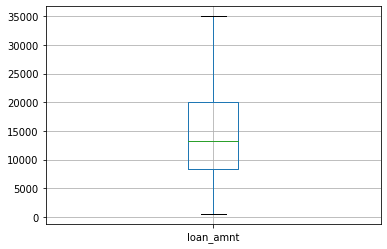

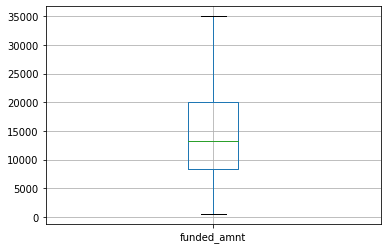

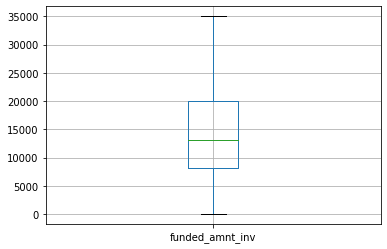

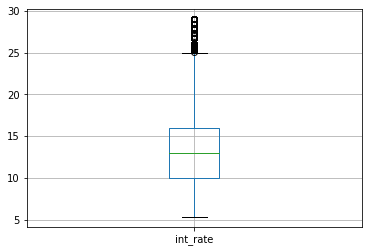

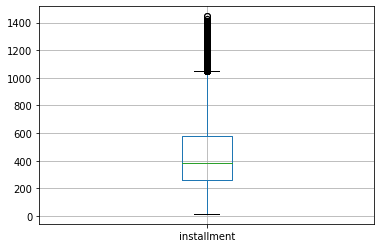

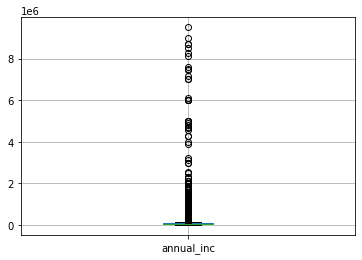

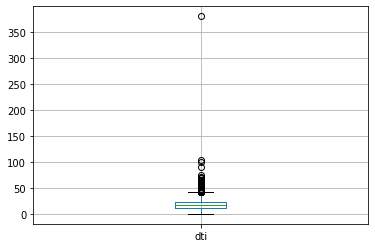

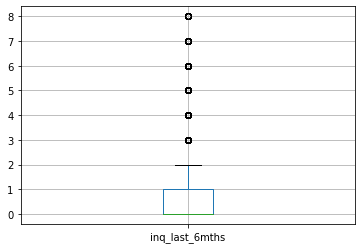

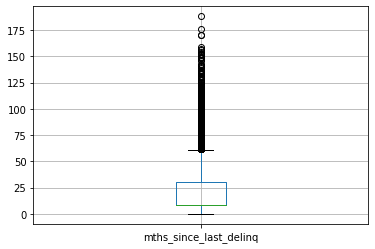

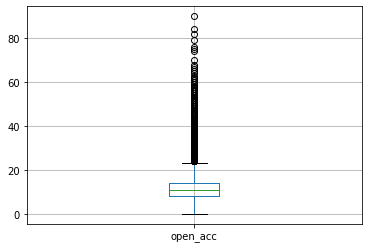

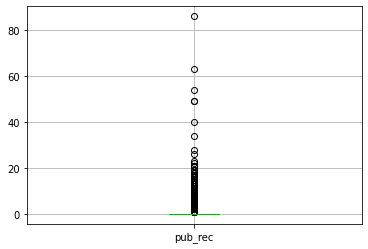

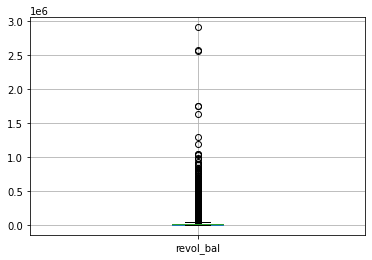

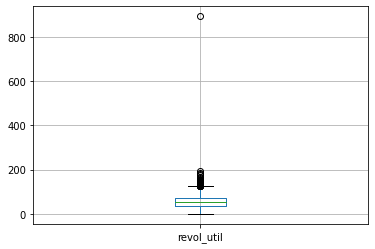

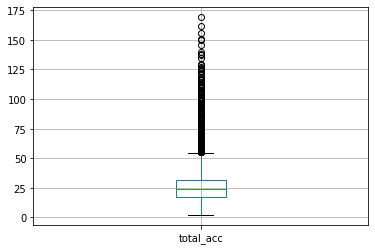

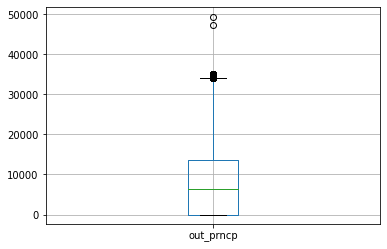

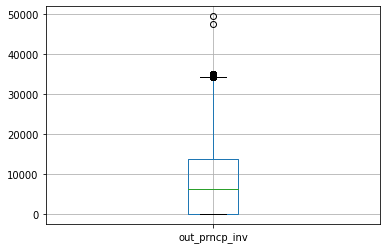

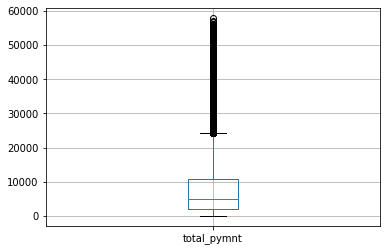

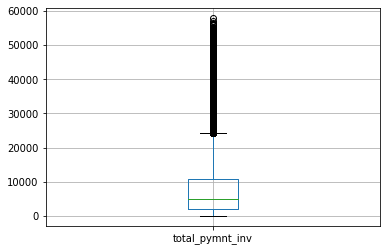

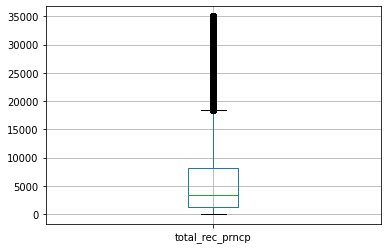

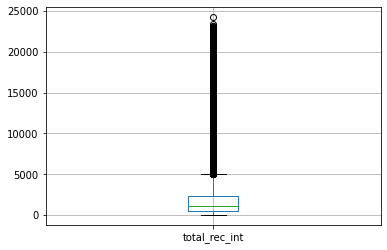

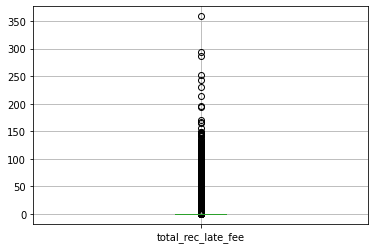

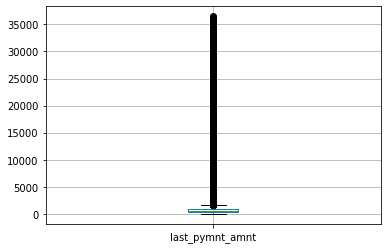

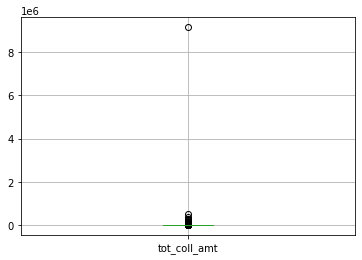

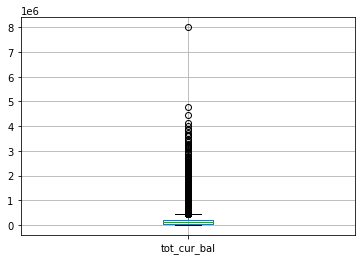

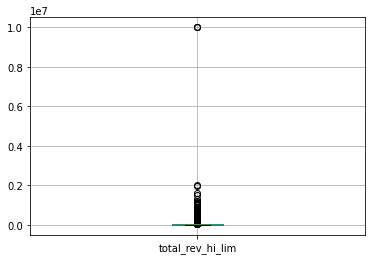

In [ ]:
import matplotlib.pyplot as plt
colname=[]
for x in df_new.columns[:-1]:
    if df_new[x].dtype=="int64" or df_new[x].dtype=="float64":
        colname.append(x)

for x in colname:
    df_new.boxplot(column=x)
    plt.show()

'''
--Variables with outliers--
dti
delinq_2yrs
pub_rec
revol_bal
revol_util
out_prncp
out_prncp_inv
total_rec_late_fee
collections_12_mnths_ex_med
acc_now_delinq
tot_coll_amt
tot_cur_bal
total_rev_hi_lim

--Continuos numerical variables--
dti
revol_util
tot_coll_amt
tot_cur_bal
total_rev_hi_lim
'''

# Treating observations with below low or over high quartile

In [ ]:
'''
# Treating the outliers with high
print(df_new.shape)

col=['revol_bal','revol_util','out_prncp','out_prncp_inv','total_rec_late_fee','tot_coll_amt','tot_cur_bal','total_rev_hi_lim']
#df_new2=df_new.copy()

for i in col:
  q1 = df_new[i].quantile(0.25) #first quartile value
  q3 = df_new[i].quantile(0.75) # third quartile value
  iqr = q3-q1 #Interquartile range
  low  = q1-1.5*iqr #acceptable range
  high = q3+1.5*iqr
  df_new_include = df_new.loc[(df_new[i] >= low) & (df_new[i] <= high)] # meeting the acceptable range
  df_new_exclude = df_new.loc[(df_new[i]< low) | (df_new[i] > high)]
  df_new_exclude[i]=high
  df_new=pd.concat([df_new_include,df_new_exclude],axis=0)
  low=0
  high=0

print(df_new.shape)
'''

Capping techinque

In [ ]:
col=['int_rate','installment','annual_inc','revol_bal','revol_util','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','last_pymnt_amnt','tot_coll_amt','tot_cur_bal','total_rev_hi_lim']
for i in col:
  q1 = df_train[i].quantile(0.25) #first quartile value
  q3 = df_train[i].quantile(0.75) # third quartile value
  iqr = q3-q1 #Interquartile range
  low  = q1-1.5*iqr #acceptable range
  high = q3+1.5*iqr
  print(i,high)

int_rate 25.485
installment 1039.29
annual_inc 156000.0
revol_bal 42169.0
revol_util 127.65000000000002
out_prncp_inv 25443.9
total_pymnt 27442.08
total_pymnt_inv 27333.965
total_rec_prncp 21789.920000000002
total_rec_int 6010.460000000001
total_rec_late_fee 0.0
last_pymnt_amnt 3743.9449999999997
tot_coll_amt 0.0
tot_cur_bal 432934.5
total_rev_hi_lim 68000.0


In [ ]:
df_train.loc[(df_train['revol_util']>800),'revol_util']=129
df_train.loc[(df_train['tot_coll_amt']>800000),'tot_coll_amt']=229
df_train.loc[(df_train['tot_cur_bal']>8000000),'tot_cur_bal']=38000
df_train.loc[(df_train['total_rev_hi_lim']>9000000),'total_rev_hi_lim']=59900

In [ ]:
col=['dti','total_rev_hi_lim']
for i in col:
  q1 = df_test[i].quantile(0.25) #first quartile value
  q3 = df_test[i].quantile(0.75) # third quartile value
  iqr = q3-q1 #Interquartile range
  low  = q1-1.5*iqr #acceptable range
  high = q3+1.5*iqr
  print(i,high)

dti 44.315
total_rev_hi_lim 84550.0


In [ ]:

df_test.loc[(df_test['dti']>350),'dti']=40.94
df_test.loc[(df_test['total_rev_hi_lim']>9000000),'total_rev_hi_lim']=84550

# Converting Categorical data into numerical data-#LabelEncoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
colname=[]
for i in df_train.columns:
    if df_train[i].dtype=='object':
        colname.append(i)
colname

print(colname)

['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d']


In [ ]:
for x in colname:
    df_train[x]=le.fit_transform(df_train[x])
    df_test[x]=le.fit_transform(df_test[x])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Upsampling -as the default_ind values in both training and testing data are biased.

In [ ]:
print(df_train.default_ind.value_counts())

0    527289
1     43584
Name: default_ind, dtype: int64


In [ ]:
from sklearn.utils import resample
df_train_minority=df_train[df_train.default_ind==1]
df_train_majority=df_train[df_train.default_ind==0]
df_train_m_upsampled =resample(df_train_minority, replace=True,     # sample with replacement
                                 n_samples=527289,
                                 random_state=10)
df_train_upsampled = pd.concat([df_train_majority, df_train_m_upsampled])

In [ ]:
print(df_train_upsampled.default_ind.value_counts())
print(df_train_upsampled.shape)

1    527289
0    527289
Name: default_ind, dtype: int64
(1054578, 37)


# Splitting  X & Y varaibles   from the training and testing data

In [ ]:
X_train=df_train_upsampled.values[:,0:-1]
Y_train=df_train_upsampled.values[:,-1]
X_test=df_test.values[:,0:-1]
Y_test=df_test.values[:,-1]


In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1054578, 36)
(1054578,)
(242035, 36)
(242035,)


In [ ]:
Y_train=Y_train.astype(int)
Y_test=Y_test.astype(int)

#Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Applying the PCA

In [ ]:
#We are using 95% variance in data
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95) #to view the entire eigen vector,no subsetting
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.20757288 0.10390541 0.08493711 0.05860708 0.04143948 0.03974916
 0.0330232  0.03099596 0.02889035 0.02882933 0.02763004 0.02747081
 0.02675691 0.02626988 0.02560942 0.02480002 0.02439804 0.0230907
 0.02201871 0.02084232 0.01932359 0.01609459 0.01454818]


#Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_DT=DecisionTreeClassifier(criterion="gini",random_state=10,splitter="best")
model_DT.fit(X_train,Y_train)
Y_pred=model_DT.predict(X_test)
#print(Y_pred)

In [ ]:
print(list(zip(df_train.columns,model_DT.feature_importances_)))

[('loan_amnt', 0.011405021571190868), ('funded_amnt', 0.12443765834962334), ('funded_amnt_inv', 0.2747867236705681), ('term', 0.09109775411811818), ('int_rate', 0.039251031126466024), ('installment', 0.006834837840654168), ('grade', 0.14822956731053472), ('sub_grade', 0.06345484005817462), ('emp_length', 0.025708470859026517), ('home_ownership', 0.004714225865208359), ('annual_inc', 0.005411911430170441), ('verification_status', 0.006429805660383364), ('issue_d', 0.005884754302178964), ('purpose', 0.011300332115638894), ('dti', 0.021605760016033156), ('inq_last_6mths', 0.006078527200329594), ('mths_since_last_delinq', 0.04764465327258219), ('open_acc', 0.005855717447946533), ('pub_rec', 0.008876446331489398), ('revol_bal', 0.014753233128417463), ('revol_util', 0.057445028844560014), ('total_acc', 0.01325327731835483), ('initial_list_status', 0.005540422162350326)]


In [ ]:
#Evaluation 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report : ")
print(classification_report(Y_test,Y_pred))
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of  the model: ",acc)


[[240815    933]
 [   147    140]]
Classification report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    241748
           1       0.13      0.49      0.21       287

    accuracy                           1.00    242035
   macro avg       0.56      0.74      0.60    242035
weighted avg       1.00      1.00      1.00    242035

Accuracy of  the model:  0.9955378354370236


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_LR=LogisticRegression()
model_LR.fit(X_train,Y_train)
Y_pred=model_LR.predict(X_test)


In [ ]:
#Evaluation 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report : ")
print(classification_report(Y_test,Y_pred))
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of  the model: ",acc)

[[241351    397]
 [    57    230]]
Classification report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    241748
           1       0.37      0.80      0.50       287

    accuracy                           1.00    242035
   macro avg       0.68      0.90      0.75    242035
weighted avg       1.00      1.00      1.00    242035

Accuracy of  the model:  0.9981242382300081


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=50, random_state=10)   


model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred) # Y_test= Y_actuals and Y_pred = the  predicted Y
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[241743      5]
 [   162    125]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    241748
           1       0.96      0.44      0.60       287

    accuracy                           1.00    242035
   macro avg       0.98      0.72      0.80    242035
weighted avg       1.00      1.00      1.00    242035

Accuracy of the model:  0.9993100171462805


# **MODEL TUNING**

# After upsampling and feature selection with Boruta gave good result

# Adjusting the Threshold

With Logistic regression classifier

In [ ]:
y_pred_prob = model_LR.predict_proba(X_test)
print(y_pred_prob)

[[0.98407737 0.01592263]
 [0.94677601 0.05322399]
 [0.98582814 0.01417186]
 ...
 [0.96332574 0.03667426]
 [0.99205336 0.00794664]
 [0.99345527 0.00654473]]


In [ ]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0] 
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :",
          cfm[1,0]," , type 1 error:", cfm[0,1])


Errors at threshold  0.4 : 278  , type 2 error : 58  , type 1 error: 220
Errors at threshold  0.41000000000000003 : 267  , type 2 error : 58  , type 1 error: 209
Errors at threshold  0.42000000000000004 : 254  , type 2 error : 58  , type 1 error: 196
Errors at threshold  0.43000000000000005 : 247  , type 2 error : 58  , type 1 error: 189
Errors at threshold  0.44000000000000006 : 239  , type 2 error : 58  , type 1 error: 181
Errors at threshold  0.45000000000000007 : 236  , type 2 error : 58  , type 1 error: 178
Errors at threshold  0.4600000000000001 : 230  , type 2 error : 58  , type 1 error: 172
Errors at threshold  0.4700000000000001 : 227  , type 2 error : 58  , type 1 error: 169
Errors at threshold  0.4800000000000001 : 223  , type 2 error : 58  , type 1 error: 165
Errors at threshold  0.4900000000000001 : 217  , type 2 error : 58  , type 1 error: 159
Errors at threshold  0.5000000000000001 : 215  , type 2 error : 58  , type 1 error: 157
Errors at threshold  0.5100000000000001 : 

In [ ]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.60:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,y_pred_class))

acc=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc)

[[241620    128]
 [    58    229]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    241748
           1       0.64      0.80      0.71       287

    accuracy                           1.00    242035
   macro avg       0.82      0.90      0.86    242035
weighted avg       1.00      1.00      1.00    242035

Accuracy of the model:  0.999231516103043


#Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_DT=DecisionTreeClassifier(criterion="gini",random_state=10,splitter="best")
model_DT.fit(X_train,Y_train)
Y_pred=model_DT.predict(X_test)
#print(Y_pred)

In [ ]:
print(list(zip(df_train.columns,model_DT.feature_importances_)))

[('loan_amnt', 0.002742476547375195), ('funded_amnt', 0.039982491362073075), ('funded_amnt_inv', 0.002431327942123474), ('term', 1.1210131143701279e-05), ('int_rate', 0.0002920165985538534), ('installment', 0.002495116352940508), ('grade', 0.0), ('sub_grade', 0.00016084385272482871), ('emp_length', 3.9113285999404846e-05), ('home_ownership', 6.75848052713491e-05), ('annual_inc', 0.0003246854510484822), ('verification_status', 6.206704999966383e-06), ('issue_d', 2.3900619886750852e-05), ('purpose', 4.5648482154081025e-05), ('dti', 0.0003849012248873146), ('inq_last_6mths', 8.080469649791481e-05), ('mths_since_last_delinq', 0.00019767425433040505), ('open_acc', 0.00010306754901274818), ('pub_rec', 0.0), ('revol_bal', 0.0002629950060515396), ('revol_util', 0.0002839733637004006), ('total_acc', 0.00018797012356540149), ('initial_list_status', 0.0), ('out_prncp', 4.1704096713591785e-05), ('out_prncp_inv', 0.4207841826337287), ('total_pymnt', 0.00020967008427825505), ('total_pymnt_inv', 0.00

In [ ]:
#Evaluation 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report : ")
print(classification_report(Y_test,Y_pred))
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of  the model: ",acc)


[[230511  11237]
 [    54    233]]
Classification report : 
              precision    recall  f1-score   support

           0       1.00      0.95      0.98    241748
           1       0.02      0.81      0.04       287

    accuracy                           0.95    242035
   macro avg       0.51      0.88      0.51    242035
weighted avg       1.00      0.95      0.97    242035

Accuracy of  the model:  0.9533497221476233


# Tuning the Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_DT=DecisionTreeClassifier(criterion="gini",random_state=10,splitter="best",min_samples_leaf=3,max_depth=12)
model_DT.fit(X_train,Y_train)
Y_pred=model_DT.predict(X_test)

In [ ]:
#Evaluation 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report : ")
print(classification_report(Y_test,Y_pred))
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of  the model: ",acc)

[[230871  10877]
 [    54    233]]
Classification report : 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    241748
           1       0.02      0.81      0.04       287

    accuracy                           0.95    242035
   macro avg       0.51      0.88      0.51    242035
weighted avg       1.00      0.95      0.98    242035

Accuracy of  the model:  0.9548371103352821


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=50, random_state=10)   


model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred) # Y_test= Y_actuals and Y_pred = the  predicted Y
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[232900   8848]
 [    44    243]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    241748
           1       0.03      0.85      0.05       287

    accuracy                           0.96    242035
   macro avg       0.51      0.91      0.52    242035
weighted avg       1.00      0.96      0.98    242035

Accuracy of the model:  0.9632615117648274


# Tuning the Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=50, random_state=10,min_samples_leaf=3,max_depth=25)   
model_RandomForest.fit(X_train,Y_train)
Y_pred=model_RandomForest.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred) 
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[229226  12522]
 [    43    244]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    241748
           1       0.02      0.85      0.04       287

    accuracy                           0.95    242035
   macro avg       0.51      0.90      0.51    242035
weighted avg       1.00      0.95      0.97    242035

Accuracy of the model:  0.948086020616853


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=50, random_state=10,min_samples_leaf=3,max_depth=20)
model_RandomForest.fit(X_train,Y_train)
Y_pred=model_RandomForest.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred) 
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[195674  46074]
 [    27    260]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.81      0.89    241748
           1       0.01      0.91      0.01       287

    accuracy                           0.81    242035
   macro avg       0.50      0.86      0.45    242035
weighted avg       1.00      0.81      0.89    242035

Accuracy of the model:  0.8095275476687256


# XGBOOST

In [ ]:
import xgboost as xgb
model_XG=xgb.XGBClassifier(random_state=10,learning_rate=0.01,n_estimators=100,max_depth=25)
model_XG.fit(X_train, Y_train)
Y_pred=model_XG.predict(X_test)
print(Y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred) 
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[235785   5963]
 [    56    231]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    241748
           1       0.04      0.80      0.07       287

    accuracy                           0.98    242035
   macro avg       0.52      0.89      0.53    242035
weighted avg       1.00      0.98      0.99    242035

Accuracy of the model:  0.9751316958291156


# Using SGD Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier
#create a model
classifier_SGD=SGDClassifier(loss="log",random_state=10,alpha=0.0001,max_iter=1000, shuffle=True,
                         early_stopping=True,n_iter_no_change=3) #try at aplha = 0.001, n_iter_no_change=3
classifier_SGD.fit(X_train,Y_train)

Y_pred=classifier_SGD.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

print(list(zip(df_new.columns[:-1],model_LR.coef_.ravel())))
#print(classifier.intercept_)

[('loan_amnt', 1.920976743988419), ('funded_amnt', 19.920936617685243), ('funded_amnt_inv', 13.118478013966635), ('term', 0.2633760158184445), ('int_rate', 1.6865522550936685), ('installment', 1.3412465238896603), ('grade', 0.04058334075958478), ('sub_grade', -1.3689958479573527), ('emp_length', 0.010316258110476111), ('home_ownership', 0.10673625972707669), ('annual_inc', -0.17718732529791031), ('verification_status', -0.011852769753668127), ('issue_d', 0.02587581715601632), ('purpose', 0.07622013637595293), ('dti', 0.005887801606842255), ('inq_last_6mths', 0.11886246772696349), ('mths_since_last_delinq', -0.018895540252953213), ('open_acc', 0.013314435546073318), ('pub_rec', -0.04868266810190845), ('revol_bal', -0.07745488546271383), ('revol_util', 0.0006261707175775457), ('total_acc', -3.167933235509847e-05), ('initial_list_status', -0.19139360299123503), ('out_prncp', -13.499175170369263), ('out_prncp_inv', -13.428375589923197), ('total_pymnt', -2.862195544209797), ('total_pymnt_in

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)



[[241596    152]
 [    58    229]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    241748
           1       0.60      0.80      0.69       287

    accuracy                           1.00    242035
   macro avg       0.80      0.90      0.84    242035
weighted avg       1.00      1.00      1.00    242035

Accuracy of the model:  0.9991323568905324


# K-Fold

In [ ]:
classifier=LogisticRegression()

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10,random_state=10)
print(kfold_cv)

KFold(n_splits=10, random_state=10, shuffle=False)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())


In [ ]:

for train_value, test_value in kfold_cv.split(X_train):
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])


Y_pred=classifier.predict(X_test)
print(list(zip(Y_test,Y_pred)))

In [ ]:
#Evaluation 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report : ")
print(classification_report(Y_test,Y_pred))
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of  the model: ",acc)

[[241622    126]
 [    58    229]]
Classification report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    241748
           1       0.65      0.80      0.71       287

    accuracy                           1.00    242035
   macro avg       0.82      0.90      0.86    242035
weighted avg       1.00      1.00      1.00    242035

Accuracy of  the model:  0.9992397793707521


# Ensemble Modelling

In [ ]:
from sklearn.ensemble import VotingClassifier


In [ ]:
estimators = []
model1 = LogisticRegression()
estimators.append(('log', model1))
model2=RandomForestClassifier(n_estimators=50,min_samples_leaf=3,max_depth=25)
estimators.append(('RF',model2))
model3=SGDClassifier(loss="log",random_state=10,alpha=0.0001,max_iter=1000, shuffle=True,
                         early_stopping=True,n_iter_no_change=3) #try at aplha = 0.001, n_iter_no_change=3
estimators.append(('sgd',model3))


In [ ]:
ensemble = VotingClassifier(estimators)   
ensemble.fit(X_train,Y_train)
Y_pred=ensemble.predict(X_test)
print(Y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred) 
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

NameError: ignored

# AUC

0.9325923173144447


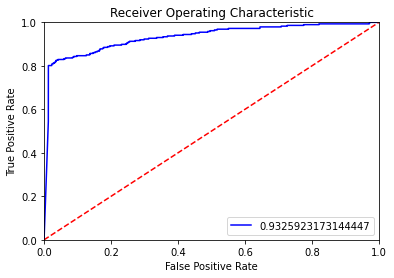

0.8942376586578855


In [ ]:
#auc mostly checks for getting model proficiancy is good or bad or very good
from sklearn import metrics

fpr,tpr,z=metrics.roc_curve(Y_test,y_pred_prob[:,1])
auc=metrics.auc(fpr,tpr)
print(auc)
#%%
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()
#%%
#its additional thing
from sklearn import metrics

fpr,tpr,z=metrics.roc_curve(Y_test,y_pred_class)
auc=metrics.auc(fpr,tpr)
print(auc)

In [ ]:

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.3, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [ ]:

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.3, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()
